In [4]:
import pandas as pd
import numpy as np

# Load & Clean the Data

For this project, I am using the classic Wisconsin Breast Cancer data set to build several SVM classifier models. This data set is comprised of thirty explanatory features, which are different measurements of a tumor and then the classification of whether the tumor was malignant or benign. I accessed the dataset from Kaggle.com. It is also available in the Python scikit-learn package. After loading the data, I deleted two columns - an ID column and a column that was completely blank.

In [5]:
from google.colab import files
uploaded = files.upload()

Saving datasets-180-408-data.csv to datasets-180-408-data.csv


In [6]:
import io
bc = pd.read_csv(io.BytesIO(uploaded['datasets-180-408-data.csv']))

In [18]:
bc.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [19]:
bc = bc.drop(columns=['id','Unnamed: 32'])

In [20]:
bc.shape

(569, 31)

In [21]:
bc.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [22]:
bc.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Exploratory Data Analysis

In [23]:
#check for missing data
bc.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Text(0, 0.5, 'IP Skewness')

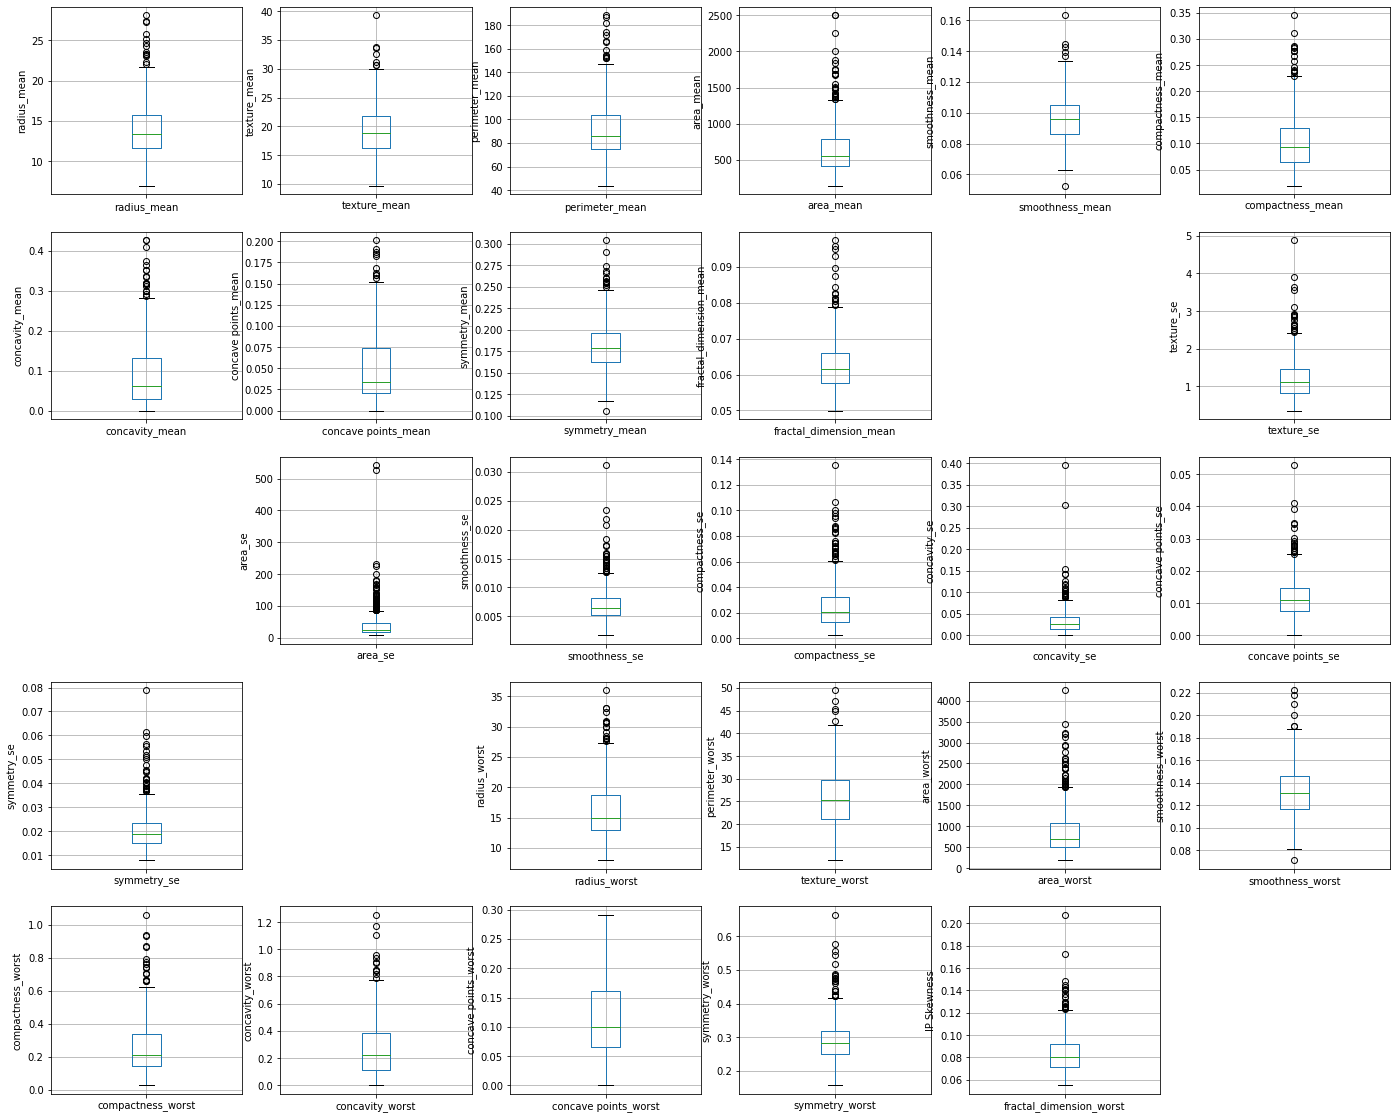

In [24]:
import matplotlib.pyplot as plt

# check for outliers using boxplots

plt.figure(figsize=(24,20))

plt.subplot(5, 6, 1)
fig = bc.boxplot(column='radius_mean')
fig.set_title('')
fig.set_ylabel('radius_mean')


plt.subplot(5, 6, 2)
fig = bc.boxplot(column='texture_mean')
fig.set_title('')
fig.set_ylabel('texture_mean')


plt.subplot(5, 6, 3)
fig = bc.boxplot(column='perimeter_mean')
fig.set_title('')
fig.set_ylabel('perimeter_mean')


plt.subplot(5, 6, 4)
fig = bc.boxplot(column='area_mean')
fig.set_title('')
fig.set_ylabel('area_mean')


plt.subplot(5, 6, 5)
fig = bc.boxplot(column='smoothness_mean')
fig.set_title('')
fig.set_ylabel('smoothness_mean')

plt.subplot(5, 6, 6)
fig = bc.boxplot(column='compactness_mean')
fig.set_title('')
fig.set_ylabel('compactness_mean')


plt.subplot(5, 6, 7)
fig = bc.boxplot(column='concavity_mean')
fig.set_title('')
fig.set_ylabel('concavity_mean')


plt.subplot(5, 6, 8)
fig = bc.boxplot(column='concave points_mean')
fig.set_title('')
fig.set_ylabel('concave points_mean')


plt.subplot(5, 6, 9)
fig = bc.boxplot(column='symmetry_mean')
fig.set_title('')
fig.set_ylabel('symmetry_mean')


plt.subplot(5, 6, 10)
fig = bc.boxplot(column='fractal_dimension_mean')
fig.set_title('')
fig.set_ylabel('fractal_dimension_mean')

plt.subplot(5, 3, 11)
fig = bc.boxplot(column='radius_se')
fig.set_title('')
fig.set_ylabel('radius_se')


plt.subplot(5, 6, 12)
fig = bc.boxplot(column='texture_se')
fig.set_title('')
fig.set_ylabel('texture_se')


plt.subplot(5, 3, 13)
fig = bc.boxplot(column='perimeter_se')
fig.set_title('')
fig.set_ylabel('perimeter_se')


plt.subplot(5, 6, 14)
fig = bc.boxplot(column='area_se')
fig.set_title('')
fig.set_ylabel('area_se')


plt.subplot(5, 6, 15)
fig = bc.boxplot(column='smoothness_se')
fig.set_title('')
fig.set_ylabel('smoothness_se')

plt.subplot(5, 6, 16)
fig = bc.boxplot(column='compactness_se')
fig.set_title('')
fig.set_ylabel('compactness_se')


plt.subplot(5, 6, 17)
fig = bc.boxplot(column='concavity_se')
fig.set_title('')
fig.set_ylabel('concavity_se')


plt.subplot(5, 6, 18)
fig = bc.boxplot(column='concave points_se')
fig.set_title('')
fig.set_ylabel('concave points_se')


plt.subplot(5, 6, 19)
fig = bc.boxplot(column='symmetry_se')
fig.set_title('')
fig.set_ylabel('symmetry_se')


#plt.subplot(5, 6, 20)
#fig = bc.boxplot(column='fractal_dimmension_se')
#fig.set_title('')
#fig.set_ylabel('fractal_dimmension_se')

plt.subplot(5, 6, 21)
fig = bc.boxplot(column='radius_worst')
fig.set_title('')
fig.set_ylabel('radius_worst')


plt.subplot(5, 6, 22)
fig = bc.boxplot(column='texture_worst')
fig.set_title('')
fig.set_ylabel('perimeter_worst')


plt.subplot(5, 6, 23)
fig = bc.boxplot(column='area_worst')
fig.set_title('')
fig.set_ylabel('area_worst')


plt.subplot(5, 6, 24)
fig = bc.boxplot(column='smoothness_worst')
fig.set_title('')
fig.set_ylabel('smoothness_worst')


plt.subplot(5, 6, 25)
fig = bc.boxplot(column='compactness_worst')
fig.set_title('')
fig.set_ylabel('compactness_worst')

plt.subplot(5, 6, 26)
fig = bc.boxplot(column='concavity_worst')
fig.set_title('')
fig.set_ylabel('concavity_worst')


plt.subplot(5, 6, 27)
fig = bc.boxplot(column='concave points_worst')
fig.set_title('')
fig.set_ylabel('concave points_worst')


plt.subplot(5, 6, 28)
fig = bc.boxplot(column='symmetry_worst')
fig.set_title('')
fig.set_ylabel('symmetry_worst')


plt.subplot(5, 6, 29)
fig = bc.boxplot(column='fractal_dimension_worst')
fig.set_title('')
fig.set_ylabel('IP Skewness')


Most of the features contain outliers and so the C parameter should be higher when training the model.

Text(0, 0.5, 'Number')

<Figure size 1728x1440 with 0 Axes>

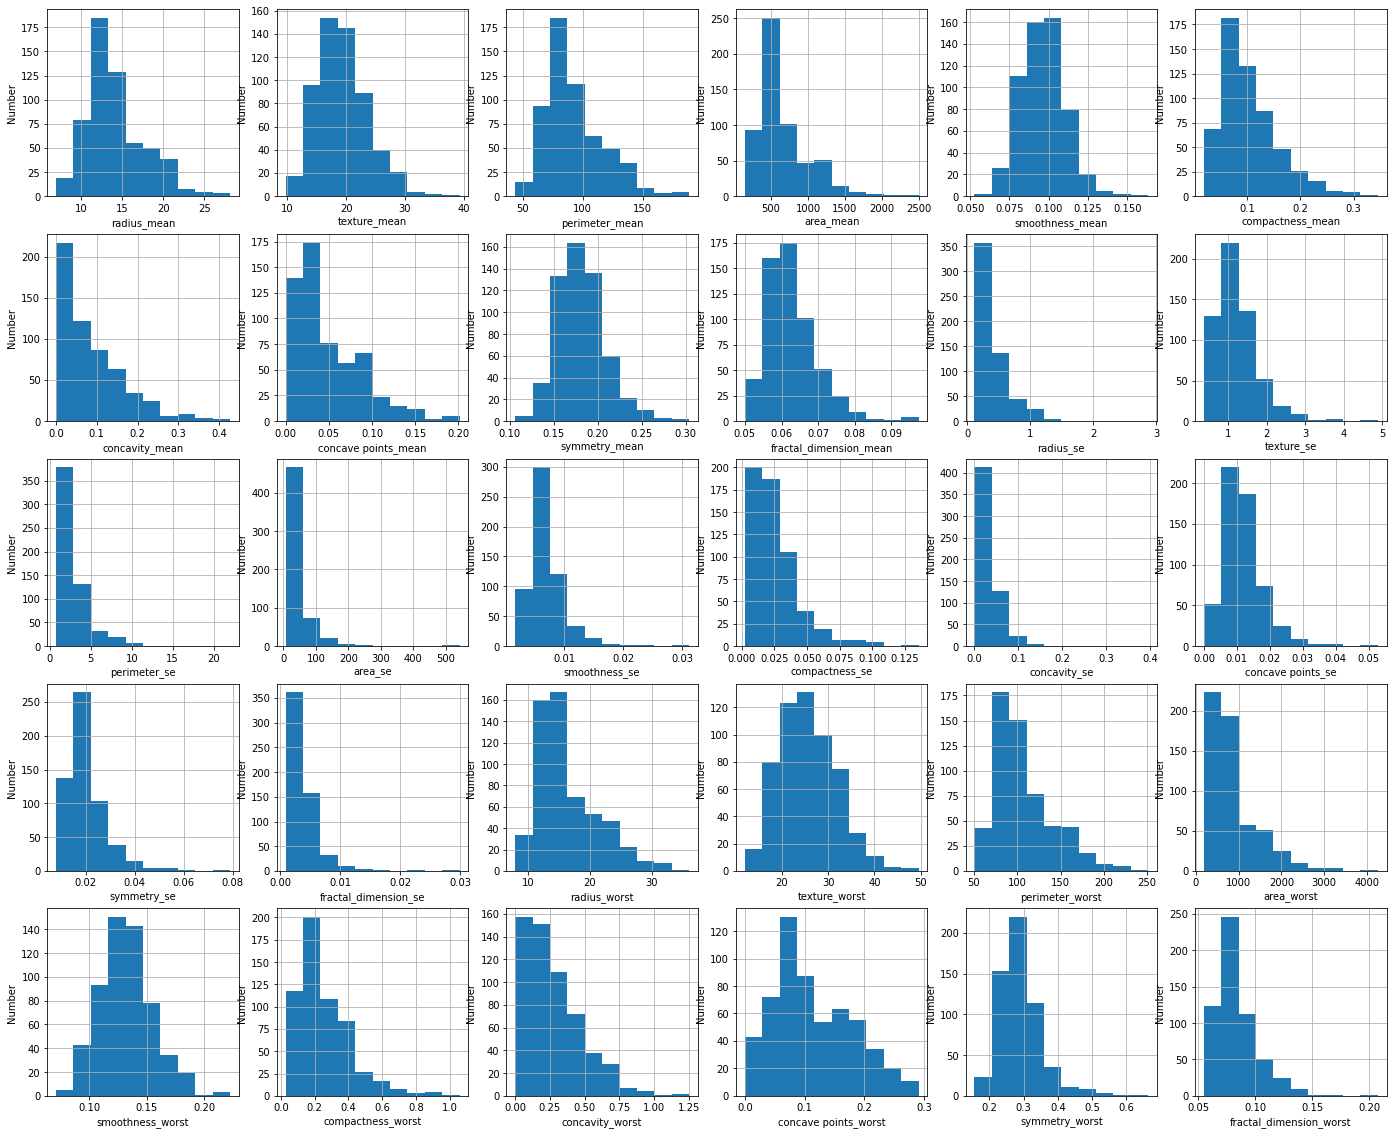

In [25]:
# use histograms to check the distribution of the data

plt.figure(figsize=(24,20))

# plot histogram to check distribution


plt.figure(figsize=(24,20))


plt.subplot(5, 6, 1)
fig = bc['radius_mean'].hist(bins=10)
fig.set_xlabel('radius_mean')
fig.set_ylabel('Number')


plt.subplot(5, 6, 2)
fig = bc['texture_mean'].hist(bins=10)
fig.set_xlabel('texture_mean')
fig.set_ylabel('Number')


plt.subplot(5, 6, 3)
fig = bc['perimeter_mean'].hist(bins=10)
fig.set_xlabel('perimeter_mean')
fig.set_ylabel('Number')



plt.subplot(5, 6, 4)
fig = bc['area_mean'].hist(bins=10)
fig.set_xlabel('area_mean')
fig.set_ylabel('Number')



plt.subplot(5, 6, 5)
fig = bc['smoothness_mean'].hist(bins=10)
fig.set_xlabel('smoothness_mean')
fig.set_ylabel('Number')



plt.subplot(5, 6, 6)
fig = bc['compactness_mean'].hist(bins=10)
fig.set_xlabel('compactness_mean')
fig.set_ylabel('Number')


plt.subplot(5, 6, 7)
fig = bc['concavity_mean'].hist(bins=10)
fig.set_xlabel('concavity_mean')
fig.set_ylabel('Number')


plt.subplot(5, 6, 8)
fig = bc['concave points_mean'].hist(bins=10)
fig.set_xlabel('concave points_mean')
fig.set_ylabel('Number')


plt.subplot(5, 6, 9)
fig = bc['symmetry_mean'].hist(bins=10)
fig.set_xlabel('symmetry_mean')
fig.set_ylabel('Number')



plt.subplot(5, 6, 10)
fig = bc['fractal_dimension_mean'].hist(bins=10)
fig.set_xlabel('fractal_dimension_mean')
fig.set_ylabel('Number')



plt.subplot(5, 6, 11)
fig = bc['radius_se'].hist(bins=10)
fig.set_xlabel('radius_se')
fig.set_ylabel('Number')



plt.subplot(5, 6, 12)
fig = bc['texture_se'].hist(bins=10)
fig.set_xlabel('texture_se')
fig.set_ylabel('Number')



plt.subplot(5, 6, 13)
fig = bc['perimeter_se'].hist(bins=10)
fig.set_xlabel('perimeter_se')
fig.set_ylabel('Number')


plt.subplot(5, 6, 14)
fig = bc['area_se'].hist(bins=10)
fig.set_xlabel('area_se')
fig.set_ylabel('Number')


plt.subplot(5, 6, 15)
fig = bc['smoothness_se'].hist(bins=10)
fig.set_xlabel('smoothness_se')
fig.set_ylabel('Number')



plt.subplot(5, 6, 16)
fig = bc['compactness_se'].hist(bins=10)
fig.set_xlabel('compactness_se')
fig.set_ylabel('Number')



plt.subplot(5, 6, 17)
fig = bc['concavity_se'].hist(bins=10)
fig.set_xlabel('concavity_se')
fig.set_ylabel('Number')



plt.subplot(5, 6, 18)
fig = bc['concave points_se'].hist(bins=10)
fig.set_xlabel('concave points_se')
fig.set_ylabel('Number')


plt.subplot(5, 6, 19)
fig = bc['symmetry_se'].hist(bins=10)
fig.set_xlabel('symmetry_se')
fig.set_ylabel('Number')


plt.subplot(5, 6, 20)
fig = bc['fractal_dimension_se'].hist(bins=10)
fig.set_xlabel('fractal_dimension_se')
fig.set_ylabel('Number')


plt.subplot(5, 6, 21)
fig = bc['radius_worst'].hist(bins=10)
fig.set_xlabel('radius_worst')
fig.set_ylabel('Number')



plt.subplot(5, 6, 22)
fig = bc['texture_worst'].hist(bins=10)
fig.set_xlabel('texture_worst')
fig.set_ylabel('Number')



plt.subplot(5, 6, 23)
fig = bc['perimeter_worst'].hist(bins=10)
fig.set_xlabel('perimeter_worst')
fig.set_ylabel('Number')



plt.subplot(5, 6, 24)
fig = bc['area_worst'].hist(bins=10)
fig.set_xlabel('area_worst')
fig.set_ylabel('Number')



plt.subplot(5, 6, 25)
fig = bc['smoothness_worst'].hist(bins=10)
fig.set_xlabel('smoothness_worst')
fig.set_ylabel('Number')


plt.subplot(5, 6, 26)
fig = bc['compactness_worst'].hist(bins=10)
fig.set_xlabel('compactness_worst')
fig.set_ylabel('Number')



plt.subplot(5, 6, 27)
fig = bc['concavity_worst'].hist(bins=10)
fig.set_xlabel('concavity_worst')
fig.set_ylabel('Number')



plt.subplot(5, 6, 28)
fig = bc['concave points_worst'].hist(bins=10)
fig.set_xlabel('concave points_worst')
fig.set_ylabel('Number')



plt.subplot(5, 6, 29)
fig = bc['symmetry_worst'].hist(bins=10)
fig.set_xlabel('symmetry_worst')
fig.set_ylabel('Number')


plt.subplot(5, 6, 30)
fig = bc['fractal_dimension_worst'].hist(bins=10)
fig.set_xlabel('fractal_dimension_worst')
fig.set_ylabel('Number')

Many of the continuouse variables are skewed.

# Modeling

In [26]:
from sklearn.model_selection import train_test_split

# Define the target class and split data into train and test sets

X = bc.drop(['diagnosis'], axis=1)
y = bc['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1, stratify=y)

X_train.shape, X_test.shape

((426, 30), (143, 30))

In [27]:
from sklearn.preprocessing import StandardScaler

# scale the features

cols = X_train.columns


scaler = StandardScaler()


X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


X_train = pd.DataFrame(X_train, columns= [cols])
X_test = pd.DataFrame(X_test, columns= [cols])


X_train.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02
mean,4.100789e-16,6.072347e-17,1.051584e-16,-1.254865e-16,-7.047049e-16,-3.438173e-16,1.224894e-16,1.671850e-16,-4.847453e-16,3.007506e-16,-2.135746e-16,-1.368233e-17,-1.271805e-16,1.146709e-16,3.625816e-16,6.411147e-17,9.642782e-17,-1.798249e-17,-2.368345e-16,-8.551454e-17,8.105149e-17,-7.505733e-16,1.347383e-16,1.159740e-16,1.746125e-16,-1.308291e-16,7.388456e-17,-3.563920e-17,1.052888e-16,-7.505733e-17
std,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00
min,-2.036673e+00,-2.222275e+00,-1.987548e+00,-1.468352e+00,-3.091595e+00,-1.510463e+00,-1.105369e+00,-1.258405e+00,-2.745158e+00,-1.771777e+00,-1.112314e+00,-1.508310e+00,-1.087517e+00,-7.843052e-01,-1.871453e+00,-1.256216e+00,-9.974714e-01,-1.846447e+00,-1.555594e+00,-1.041854e+00,-1.723733e+00,-2.172642e+00,-1.686382e+00,-1.218150e+00,-2.678109e+00,-1.443316e+00,-1.281509e+00,-1.711156e+00,-2.154793e+00,-1.589301e+00
25%,-6.853083e-01,-7.562036e-01,-6.952778e-01,-6.698354e-01,-7.835366e-01,-7.242467e-01,-7.414942e-01,-7.427373e-01,-6.994361e-01,-7.175781e-01,-6.559777e-01,-6.712818e-01,-6.556058e-01,-5.272329e-01,-6.191607e-01,-6.936246e-01,-5.330886e-01,-6.654324e-01,-6.477823e-01,-5.596632e-01,-6.735307e-01,-7.640721e-01,-6.985223e-01,-6.439792e-01,-6.673977e-01,-7.105592e-01,-7.633663e-01,-7.729700e-01,-6.438731e-01,-7.045032e-01
50%,-1.980855e-01,-9.592061e-02,-1.984097e-01,-2.840192e-01,-1.677269e-02,-1.983327e-01,-3.735126e-01,-4.004482e-01,-1.051633e-01,-2.072122e-01,-2.988739e-01,-2.291050e-01,-2.937762e-01,-3.592561e-01,-1.912935e-01,-2.959813e-01,-2.388239e-01,-1.811818e-01,-2.187812e-01,-2.551102e-01,-2.697657e-01,-6.218550e-02,-2.796010e-01,-3.398931e-01,-3.192879e-02,-2.542822e-01,-2.341106e-01,-2.068229e-01,-1.268421e-01,-2.402577e-01
75%,4.755965e-01,5.892896e-01,5.013376e-01,3.743837e-01,6.236093e-01,4.680743e-01,5.690304e-01,7.196835e-01,5.192338e-01,4.697896e-01,3.218447e-01,4.571083e-01,2.593006e-01,1.264598e-01,3.933003e-01,3.755106e-01,3.098530e-01,4.826790e-01,3.957008e-01,2.432167e-01,5.222746e-01,7.044538e-01,5.346717e-01,3.583075e-01,6.046358e-01,5.464111e-01,5.268970e-01,7.331066e-01,4.661164e-01,4.408179e-01
max,3.804000e+00,3.366072e+00,3.925699e+00,5.328298e+00,4.729256e+00,4.435398e+00,4.122263e+00,3.626332e+00,4.484703e+00,4.809992e+00,8.059596e+00,6.572309e+00,8.099027e+00,1.195317e+01,8.654635e+00,4.489632e+00,1.111886e+01,6.327364e+00,7.174042e+00,9.268492e+00,4.081809e+00,3.826170e+00,4.266570e+00,5.894615e+00,3.958378e+00,5.061375e+00,4.515762e+00,2.608142e+00,5.997183e+00,6.737626e+00


In [31]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Base SVM model with default parameters

svc = SVC()

svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)



print('Accuracy score for base model with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Accuracy score for base model with default hyperparameters: 0.9580
Confusion matrix

 [[88  2]
 [ 4 49]]

True Positives(TP) =  88

True Negatives(TN) =  49

False Positives(FP) =  2

False Negatives(FN) =  4


The first model performed pretty well, but since the dataset had outliers increasing the C parameter from the default of 1 might improve model performance.

In [35]:
# model where C=100

svc100 = SVC(C=100.0)

svc100.fit(X_train, y_train)

y_pred100 = svc100.predict(X_test)



print('Accuracy score for model with C parameter adjusted to 100: {0:0.4f}'. format(accuracy_score(y_test, y_pred100)))

cm100 = confusion_matrix(y_test, y_pred100)

print('Confusion matrix\n\n', cm100)

print('\nTrue Positives(TP) = ', cm100[0,0])

print('\nTrue Negatives(TN) = ', cm100[1,1])

print('\nFalse Positives(FP) = ', cm100[0,1])

print('\nFalse Negatives(FN) = ', cm100[1,0])

Accuracy score for model with C parameter adjusted to 100: 0.9510
Confusion matrix

 [[88  2]
 [ 5 48]]

True Positives(TP) =  88

True Negatives(TN) =  48

False Positives(FP) =  2

False Negatives(FN) =  5


Tunig the C parameter did not improve the accuracy of the model and increased the false negative results. Next I will check to see if a linear kernel improves my SVM model.

In [38]:
#SVM Model with a linear kernel, C=1

linear_svm = SVC(kernel ='linear', C=1.0)


linear_svm.fit(X_train, y_train)
y_pred_linear = linear_svm.predict(X_test)


print('Accuracy score for a linear model with C parameter set to 1.0: {0:0.4f}'. format(accuracy_score(y_test, y_pred_linear)))

cm_linear = confusion_matrix(y_test, y_pred_linear)

print('Confusion matrix\n\n', cm_linear)

print('\nTrue Positives(TP) = ', cm_linear[0,0])

print('\nTrue Negatives(TN) = ', cm_linear[1,1])

print('\nFalse Positives(FP) = ', cm_linear[0,1])

print('\nFalse Negatives(FN) = ', cm_linear[1,0])

Accuracy score for a linear model with C parameter set to 1.0: 0.9580
Confusion matrix

 [[88  2]
 [ 4 49]]

True Positives(TP) =  88

True Negatives(TN) =  49

False Positives(FP) =  2

False Negatives(FN) =  4


Since the linear tied for best accuracy with the base model, I'm going to check to see if increasing the parameter C to 100 improves it at all.

In [40]:
#SVM Model with a linear kernel, C=100

linear_svm100 = SVC(kernel ='linear', C=100.0)


linear_svm100.fit(X_train, y_train)
y_pred_linear100 = linear_svm100.predict(X_test)


print('Accuracy score for a linear model with C parameter set to 100.0: {0:0.4f}'. format(accuracy_score(y_test, y_pred_linear100)))

cm_linear100 = confusion_matrix(y_test, y_pred_linear)

print('Confusion matrix\n\n', cm_linear100)

print('\nTrue Positives(TP) = ', cm_linear100[0,0])

print('\nTrue Negatives(TN) = ', cm_linear100[1,1])

print('\nFalse Positives(FP) = ', cm_linear100[0,1])

print('\nFalse Negatives(FN) = ', cm_linear100[1,0])

Accuracy score for a linear model with C parameter set to 100.0: 0.9650
Confusion matrix

 [[88  2]
 [ 4 49]]

True Positives(TP) =  88

True Negatives(TN) =  49

False Positives(FP) =  2

False Negatives(FN) =  4


Increasing C to 100 with the linear SVM model resulted in the highest accuracy thus far, so I am going to see if increasing it again improves it any more.

In [41]:
#SVM Model with a linear kernel, C=1000

linear_svm1000 = SVC(kernel ='linear', C=1000.0)


linear_svm1000.fit(X_train, y_train)
y_pred_linear1000 = linear_svm1000.predict(X_test)


print('Accuracy score for a linear model with C parameter set to 1000.0: {0:0.4f}'. format(accuracy_score(y_test, y_pred_linear1000)))

cm_linear1000 = confusion_matrix(y_test, y_pred_linear)

print('Confusion matrix\n\n', cm_linear1000)

print('\nTrue Positives(TP) = ', cm_linear1000[0,0])

print('\nTrue Negatives(TN) = ', cm_linear1000[1,1])

print('\nFalse Positives(FP) = ', cm_linear1000[0,1])

print('\nFalse Negatives(FN) = ', cm_linear1000[1,0])

Accuracy score for a linear model with C parameter set to 1000.0: 0.9650
Confusion matrix

 [[88  2]
 [ 4 49]]

True Positives(TP) =  88

True Negatives(TN) =  49

False Positives(FP) =  2

False Negatives(FN) =  4


Increasing C to 1000 didn't improve the linear SVM model at all and so I will continue to use the linear model where C=100 as my most accurate model. Next I will check for overfitting and underfiting as well as compare this model's accuracy to the null accuracy of the dataset.

In [42]:
# check for overfitting and underfitting

print('Training set score: {:.4f}'.format(linear_svm100.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(linear_svm100.score(X_test, y_test)))

Training set score: 0.9977
Test set score: 0.9650


The accuracy between the training and test sets are reasonably close and so it doesn't seem like the model over or under fit the data.

In [44]:
# check model accuracy against null accuracy

y_test.value_counts()

null_accuracy = (90/(90+53))


print('Null accuracy score: {0:0.4f}'. format(null_accuracy))
print('Linear model (C=100) accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_linear100)))

Null accuracy score: 0.6294
Linear model (C=100) accuracy score: 0.9650


This linear SVM model far out performed the null accuracy score for the test data.

# Conclusion

All the SVM models performed pretty well overall. Increasing C did improve the accuracy a bit (95.8% to 96.5%) for the linear kernel SVM model and that turned out to be the best performing model. There were more false negatives than falso positives, which is not ideal for medical testing, so that would be something to look at with additional modeling.